In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

year_ago = dt.date.today() - dt.timedelta(days=365)


prcp_list = pd.read_sql("SELECT date,prcp FROM Measurement where date >= '" +  str(year_ago) + "'", conn)
prcp_list.head()


,date,prcp


In [11]:
# Calculate the date 1 year ago from the last data point in the database
from sqlalchemy import func

max_date = session.query(Measurement,func.max(Measurement.date)).all()[0][1]
max_date= dt.datetime.strptime(max_date, '%Y-%m-%d')
max_date1=max_date.strftime("%Y-%m-%d")
print(max_date)
print(max_date1)



2017-08-23 00:00:00
2017-08-23


In [12]:

# Perform a query to retrieve the data and precipitation scores


year_ago = max_date - dt.timedelta(days=365)

year_ago =year_ago.strftime("%Y-%m-%d")
year_ago




'2016-08-23'

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Load the query results into a Pandas DataFrame and set the index to the date column.
# Sort the dataframe by date

prcp_list = pd.read_sql("SELECT date,prcp FROM Measurement where date >= '" +  str(year_ago) + "'", conn)
prcp_list=prcp_list.set_index("date").sort_values("date")
prcp_list




,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


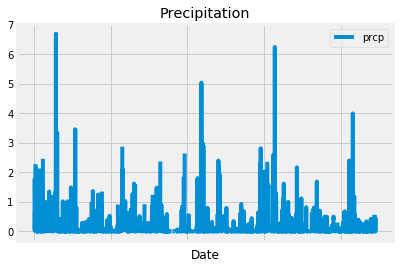

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

styles=['bs-', 'ro-', 'y^-','r*-','co-','m1-','y2-','gx-','ks-','g+-']

prcp_list.plot()
plt.title("Precipitation")
plt.xlabel("Date")
plt.show()

![precipitation](Images/precipitation.png)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_list.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [16]:
# Design a query to show how many stations are available in this dataset?
count_stn = session.query(Station,func.count(Station.station)).all()[0][1]
print("There are " + str(count_stn) + " Stations")

There are 9 Stations


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

prcp_cnt = pd.read_sql("SELECT Station,count(station) as 'Station Count' FROM Measurement group by station order by count(station) desc", conn)
prcp_cnt


,station,Station Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


prcp_stat = pd.read_sql("SELECT station,min(tobs) as Min_temp,max(tobs) as Max_temp,avg(tobs) as Avg_temp FROM Measurement group by  station ", conn)
prcp_stat

,station,Min_temp,Max_temp,Avg_temp
0,USC00511918,53.0,87.0,71.615968
1,USC00513117,59.0,85.0,72.689184
2,USC00514830,58.0,85.0,74.873297
3,USC00516128,58.0,84.0,70.915008
4,USC00517948,58.0,87.0,74.684402
5,USC00518838,58.0,83.0,72.724070
6,USC00519281,54.0,85.0,71.663781
7,USC00519397,56.0,87.0,74.553231
8,USC00519523,56.0,85.0,74.543649


In [29]:
# Choose the station with the highest number of temperature observations.
max_stn=prcp_cnt["station"][0]

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

bins = np.arange(50,90,2)
grps = np.arange(52,90,2)
prcp_stat_max = pd.read_sql("SELECT tobs FROM Measurement where station = '" + max_stn + "'", conn)

df_freq = pd.crosstab(prcp_stat_max['tobs'], columns='count')

df_freq = df_freq.reset_index()

df_freq
prcp_stat_max1= prcp_stat_max.set_index("tobs")

#prcp_stat_max1=pd.cut(prcp_stat_max["tobs"], bins,labels=grps)


#prcp_stat_max1

0       70
1       62
2       74
3       76
4       74
5       76
6       70
7       66
8       70
9       76
10      64
11      60
12      62
13      68
14      64
15      66
16      68
17      70
18      68
19      68
20      70
21      60
22      76
23      76
24      66
25      76
26      70
27      68
28      66
29      70
        ..
2742    72
2743    74
2744    74
2745    76
2746    80
2747    80
2748    76
2749    76
2750    76
2751    78
2752    78
2753    78
2754    82
2755    76
2756    78
2757    76
2758    76
2759    82
2760    82
2761    82
2762    76
2763    78
2764    82
2765    84
2766    78
2767    78
2768    78
2769    76
2770    76
2771    80
Name: tobs, Length: 2772, dtype: category
Categories (19, int64): [52 < 54 < 56 < 58 ... 82 < 84 < 86 < 88]

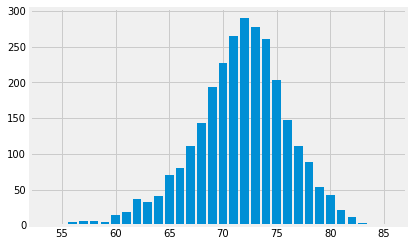

In [20]:
labels4=df_freq["tobs"].tolist()
x_pos = np.arange(len(labels4))
Met_st = plt.bar(labels4, df_freq["count"],align='center'  )

![precipitation](Images/station-histogram.png)

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
prev_yr=calc_temps(year_ago, max_date1)
print(prev_yr)

[(58.0, 74.59058295964125, 87.0)]


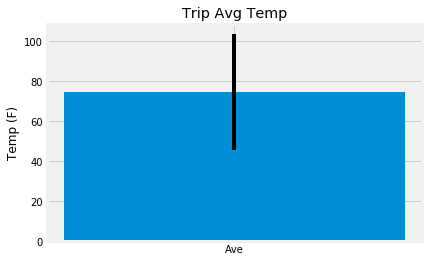

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

df=pd.DataFrame(data=prev_yr,columns=["TMIN", "TAVE", "TMAX"])

plt.bar(["Ave"],[prev_yr[0][1]])
plt.errorbar(["Ave"],[prev_yr[0][1]],[prev_yr[0][2]-prev_yr[0][0]], color="black")
plt.title("Trip Avg Temp")


plt.ylabel("Temp (F)")

# Show the Figure
plt.show()


In [24]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

prcp_stat = pd.read_sql("SELECT station,avg(prcp) as Avg_Precip FROM Measurement where date>= '" + year_ago + "' and date <= '" + max_date1 + "' group by station order by Avg_Precip desc", conn)
prcp_stat


,station,Avg_Precip
0,USC00516128,0.450640
1,USC00519281,0.198949
2,USC00513117,0.141429
3,USC00514830,0.125434
4,USC00519523,0.121051
5,USC00517948,0.076500
6,USC00519397,0.044819


## Optional Challenge Assignment

In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [28]:
# Plot the daily normals as an area plot with `stacked=False`
